In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/content/Wine_clust.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [4]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [7]:
data.shape

(178, 13)

In [8]:
from sklearn.preprocessing import StandardScaler

X = data[['Alcohol','Color_Intensity']]

In [9]:
scale = StandardScaler()
X_scaled = scale.fit_transform(X)

In [10]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scaled)
y_pred = kmeans.predict(X_scaled)

In [11]:
unique,counts =np.unique(y_pred,return_counts=True)

np.asarray((unique,counts)).T

array([[ 0, 70],
       [ 1, 35],
       [ 2, 73]])

In [12]:
from sklearn import metrics
score = metrics.silhouette_score(X, y_pred)
score

0.4553159320548753

Text(0, 0.5, 'Inertia')

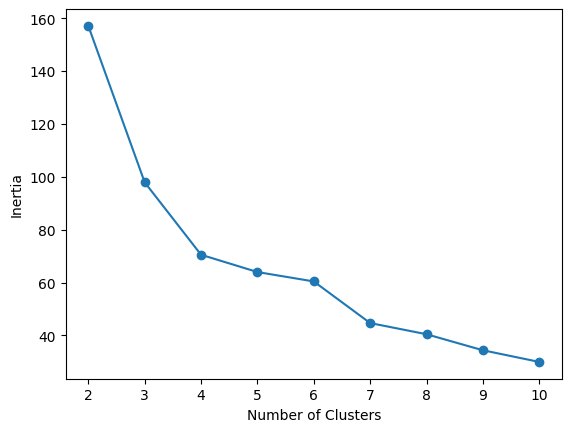

In [13]:
inertia = []
sil_score = []
list_clusters = list(range(2,11))

for num in list_clusters:
    kmeans = KMeans(n_clusters = num)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    # sil_score.append(metrics.silhouette_score(X,y_pred))


plt.plot(list_clusters,inertia)
plt.scatter(list_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

In [14]:
sil_score = []

for num in list_clusters:
    km = KMeans(n_clusters = num)
    km.fit(X_scaled)
    y_pred = km.predict(X_scaled)
    score = metrics.silhouette_score(X,y_pred)
    sil_score.append({num : score})

sil_score

[{2: 0.4195297088560899},
 {3: 0.4553159320548753},
 {4: 0.3704482993493728},
 {5: 0.36537371715526656},
 {6: 0.2628558492103407},
 {7: 0.21589928369143077},
 {8: 0.22767057627950327},
 {9: 0.2494238970738147},
 {10: 0.2419883776623772}]

In [15]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scaled)
y_pred = kmeans.predict(X_scaled)

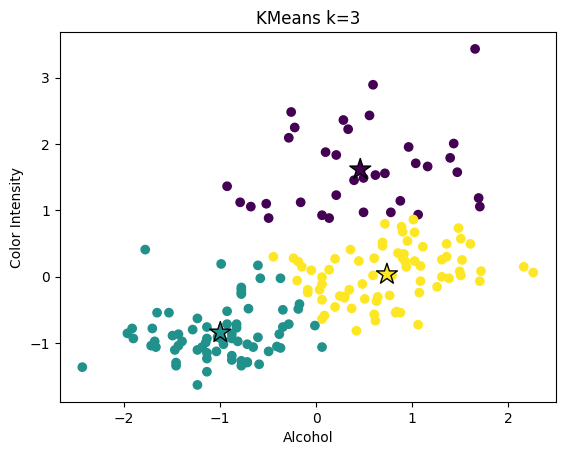

In [16]:
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=y_pred)

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="*", s=250, c=[0,1,2], edgecolors="k")

plt.xlabel("Alcohol")
plt.ylabel("Color Intensity")
plt.title("KMeans k=3")
plt.show()

In [ ]:
### Agglomerative Clustering

Text(0, 0.5, 'Feature 1')

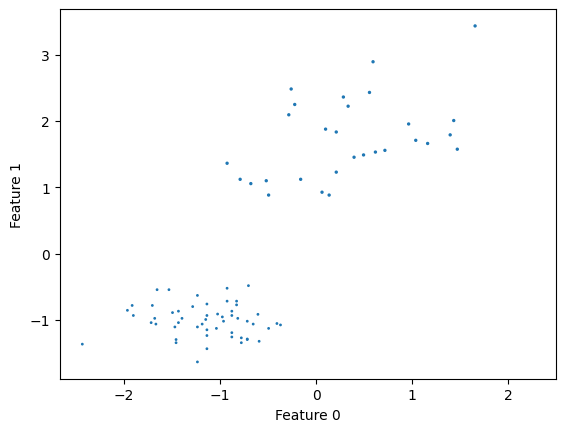

In [18]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=3)
agg_cluster = agg.fit_predict(X_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], agg_cluster)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [19]:
score = metrics.silhouette_score(X, agg_cluster)

score

0.456208182632913

In [ ]:
## Both are identical 0.45 is the score